<a href="https://colab.research.google.com/github/AhmadKRim/app/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# import required variables
import pandas as pd
import numpy as np
# sklearn for ML models
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv('/content/Adevrtising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [16]:
df[:10]# same as df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [17]:
# Check number of columns and rows
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 200 rows and 4 columns


The dataset has 200 rows and 4 columns
• It is always good idea to explore the relation between the input features (TV, Radio, . . . ) and
the response variable (Sales). We can do this using a simple visualisation
• We will use the seaborn visualization library (a powerful python library for visualisation)

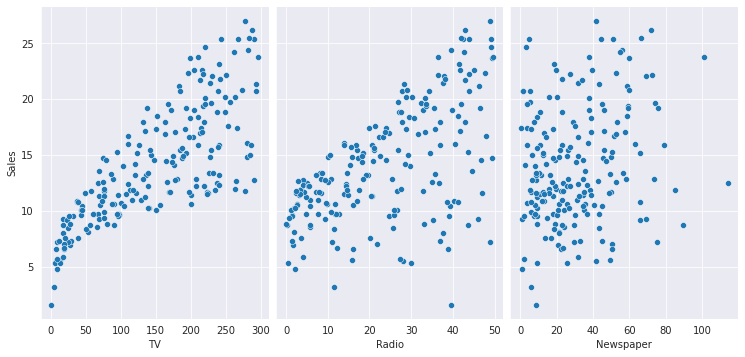

In [18]:
import seaborn as sns
sns.set_style("darkgrid")
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.7)

In [19]:
# create X and y
# columns/ features representing 'X'
feature_cols = ['TV'] 
X = df[feature_cols]
# what you want to learn predict
y = df.Sales
# lets check the type of the new constructs
print(f'The type of X is {type(X)}')
print(f'The type of y is {type(y)}')

The type of X is <class 'pandas.core.frame.DataFrame'>
The type of y is <class 'pandas.core.series.Series'>


In [20]:
# Initiate and fit
simple_lm = LinearRegression()
simple_lm.fit(X, y)

LinearRegression()

In [21]:
# print the coefficients
print ("iNTERCEPT : ",simple_lm.intercept_)
print ("CO-EFFICIENT : ",simple_lm.coef_)

iNTERCEPT :  7.032593549127695
CO-EFFICIENT :  [0.04753664]


In [22]:
# prediction with sklearn
TV = 230
print(f'Investing {TV} in Tv and Generates {simple_lm.predict([[TV]])} in Sales')

Investing 230 in Tv and Generates [17.96602085] in Sales


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
tv_230s = df.loc[(df['TV'] >= 225) & (df['TV'] <=235)]

In [24]:
print(f'Mean sales increase {tv_230s.Sales.mean()}')

Mean sales increase 16.5375


In [25]:
predictions = simple_lm.predict(X)

In [26]:
df_eval = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_eval.head()

,Actual,Predicted
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


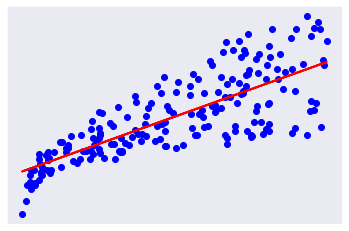

In [27]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(X, y, color='blue')# actual values from the dataset
plt.plot(X, predictions, color='red', linewidth=2)# predicted values by the model
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions)))

Mean Absolute Error: 2.549806038927486
Mean Squared Error: 10.512652915656757
Root Mean Squared Error: 3.2423221486546887


In [29]:
import statsmodels.formula.api as sm
# create a fitted model (predict sales given tv investment)
lm1 = sm.ols(formula='Sales ~ TV', data=df).fit()
# check the coefficients
print(lm1.params)

Intercept    7.032594
TV           0.047537
dtype: float64


In [30]:
# And also we can perform predictions same way
# Lets check how much sales increase would be if we invest 230 in TV Adverts
X_new = pd.DataFrame({'TV': [230]})
# predict for a new observation
lm1.predict(X_new)

0    17.966021
dtype: float64

In [31]:
# print the p-values for the model coefficients
print(f'The p value is {lm1.pvalues}')

The p value is Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [32]:
a = 1.467390e-42
output = f"{a:.50f}"
print('The p-value is ',output)

The p-value is  0.00000000000000000000000000000000000000000146739000


In [33]:
# prepare the data
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [34]:
model = LinearRegression()

In [35]:
model.fit(X, y)
# print the coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 2.938889369459412
Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]


In [36]:
model_coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
model_coeffs

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


In [37]:
# prediction with sklearn
TV = 2.75
Radio = 5.3
Newspaper = 1000
print(f'Investing {TV} in Tv and {Radio} in Radio and {Newspaper} in Newspaper \
\n will generate {model.predict([[TV, Radio, Newspaper]])}')

Investing 2.75 in Tv and 5.3 in Radio and 1000 in Newspaper 
 will generate [3.02645819]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
predictions = model.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions)))

Mean Absolute Error: 1.252011229687068
Mean Squared Error: 2.784126314510936
Root Mean Squared Error: 1.6685701407225697


In [39]:
new_sales = 2.938889369459412+ (0.04576465*TV) + (0.18853002*Radio) - (0.00103749*Newspaper)

In [40]:
print(f'The new Sales value is {new_sales}')

The new Sales value is 3.026461262959412


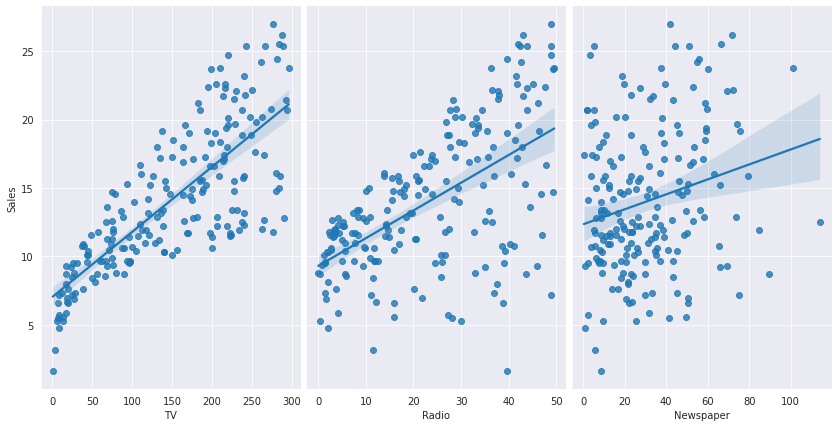

In [41]:
# plot tv, radio and newspapers against sales
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=6, aspect=0.657, kind='reg')

In [42]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 10.2 MB/s 
     |████████████████████████████████| 4.7 MB 42.4 MB/s 
     |████████████████████████████████| 182 kB 57.8 MB/s 
     |████████████████████████████████| 78 kB 5.0 MB/s 
     |████████████████████████████████| 164 kB 67.0 MB/s 
     |████████████████████████████████| 237 kB 55.3 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=df1e341b25b58e7e2f72b07bab8029c58e29c247365a0c10694cc0e5ddc861d7
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [43]:
import streamlit as st #**
import numpy as np
import pandas as pd

In [44]:
train_size = int(.8 * df.shape[0])# cast to intger
print (f'80% of the {df.shape[0]} is {train_size}')

80% of the 200 is 160


In [45]:
# using slicing to create two data frames as below
train_df = df[:train_size]
test_df = df[train_size:]

In [46]:
if ((train_df.shape[0]+test_df.shape[0]) == df.shape[0]):
     print('Split is correct')

Split is correct
